# 크롤링 
카카오맵 '강남역 맛집' 검색 후 503개의 식당 url 가져오기  
크롤링한 url 에서  8839개의 리뷰글과 별점 크롤링  
4점 이상의 리뷰는 긍정리뷰, 3점이하의 리뷰는 부정리뷰로 분류 ( y =1  긍정 , y =0 부정)  



# TF-IDF 를 이용해 핵심어 추출 
TF-IDF(Term Frequency - Inverse Document Frequency) 란?  
TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값.  
이 값이 높을수록 문서에서 중요하다고 생각할 수 있다.  
하지만 하나의 문서에서 많이 나오지 않고 다른 문서에서 자주 등장하면 단어의 중요도는 낮아진다.  
DF(문서 빈도, document frequency)라고 하며,  
이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다.  
TF-IDF는 TF와 IDF를 곱한 값으로 점수가 높은 단어일수록 다른 문서에는 많지 않고   
해당 문서에서 자주 등장하는 단어를 의미한다.  


# 한글 정제 함수를 적용해 리뷰에서 한글만 추출

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출


# konlpy 라이이브러리로 텍스트 데이터에서 형태소 추출  (from konlpy.tag import Okt)

   분류 모델의 학습데이터로 변환  

`   corpus index (말뭉치 )   생성하기   -  형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환  
      < Scikit-Learn 문서 전처리 기능 >  
         CountVectorizer: 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만듬  
         (토큰이 문서별로 몇 번 등장했는지 행렬로 정리해주는 모듈)  

      ```
      from sklearn.feature_extraction.text import CountVectorizer
      ```  
         1. 문서를 토큰 리스트로 변환한다.  
         2. 각 문서에서 토큰의 출현 빈도를 센다.  
         3. 각 문서를 BOW 인코딩 벡터로 변환한다.  


      < BOW 인코딩 >  
      문서를 숫자 벡터로 변환하는 가장 기본적인 방법은 BOW(Bag of Words) 인코딩 방법이다.  
      Bag of Words 란 단어들의 순서는 전혀 고려하지 않고,  
      단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법이다.   


# TF-IDF로 변환  -  TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환  
      from sklearn.feature_extraction.text import TfidfTransformer    
      
      TfidfTransformer:  CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.    



# 긍정 부정 리뷰 분류하기

   from sklearn.model_selection import train_test_split  
   
      train_test_split 모듈을 사용해 학습데이터셋과 테스트셋을 분리   

    로지스틱 회귀분석   
       - 선형 회귀 방식을 분류에 적용한 알고리즘   
       -  회귀 분류가 종속 변수로 연속형 데이터를 사용했다면,  
                 -  로지스틱 회귀 분석은 범주형 데이터를 사용한다는 차이가 있다. ( 0 혹은 1로 표현되는 이진분류 )  
                           -   

   ## 로지스틱 회귀모델 학습 

   ## 로지스틱 회귀 모델 성능평가 

   accuracy: 0.83   (정부분율)   TP + TN / (TP + FP + FN + TN)    전체 예측에서 옭은 예측의 비율   
   Precision : 0.824   (정확도)   TP / (TP+FP)    Y로 예측된 것 중 실제로도 Y인 비율   
   Recall : 0.882   (재현율(민감도))     TP / (TP + FN)   실제로 Y인 것들 중 예측이 Y로 된 경우의 비율   
   F1 : 0.852       2 * Precision * Recall / ( Precision + Recall)         Precision과 Recall의 조화평균으로  0 ~ 1 사이의 값을 가짐   

   from sklearn.metrics import confusion_matrix   
      Confusion Matrix(오차핼렬)을 통해 분류가 잘됬는지 확인   


   from sklearn.metrics import roc_curve, roc_auc_score  
   
   AUC 를 계산하고 ROC curve 그래프 출력   

   ROC ( Receiver Operating Characteristic)  
        Y축 - 적중확률  
        X축 - 오경보확률   
      왼쪽 상단에 선이 가까울수록 성능이 좋은 모델   

   AUC (Area Under the Curve) 는  ROC Curve 밑에쪽의 면적으로   
      면적이 넓을 수록 예측을 잘하는 모델   


# 중요 키워드 분석
* 회귀 모델의 피처 영향력 추출   
* 학습한 회귀모델의 계수를 출력   
* 회귀 모델의 계수를 높은순으로 정렬  
* 계수를 맵핑하여 어떤 형태소인지 출력   
* 계수가 높은 형태소는 긍정사전으로  
* 낮은 형태소는 부정사전으로 활용  

## 필요한 라이브러리 ##

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 리뷰 정보 가져올 음식점 URL 크롤링 ##

In [161]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3) 
driver.get('https://map.kakao.com/') 

searchbox = driver.find_element_by_xpath("//input[@id='search.keyword.query']")
searchbox.send_keys("강남역 맛집")

searchbutton = driver.find_element_by_xpath("//button[@id='search.keyword.submit']")
driver.execute_script("arguments[0].click();", searchbutton)


time.sleep(2)

html = driver.page_source

    
morebutton = driver.find_element_by_xpath("//a[@id='info.search.place.more']")
driver.execute_script("arguments[0].click();", morebutton)

time.sleep(1)

page_urls = []

for button_num in range(1, 6):
    next_rstr = driver.find_element_by_xpath("//a[@id='info.search.page.no" + str(button_num) + "']")
    driver.execute_script("arguments[0].click();", next_rstr)
    
    time.sleep(1)
    
    html = driver.page_source

    soup = BeautifulSoup(html, "html.parser")
    moreviews = soup.find_all(name="a", attrs={"class":"moreview"})
        
    for moreview in moreviews:
        page_url = moreview.get("href")
        print(page_url)
        page_urls.append(page_url)

nextbutton = driver.find_element_by_xpath("//button[@id='info.search.page.next']")
driver.execute_script("arguments[0].click();", nextbutton)

time.sleep(1)        


for button_num in range(1, 6):
    next_rstr = driver.find_element_by_xpath("//a[@id='info.search.page.no" + str(button_num) + "']")
    driver.execute_script("arguments[0].click();", next_rstr)
    
    time.sleep(1)
    
    html = driver.page_source

    soup = BeautifulSoup(html, "html.parser")
    moreviews = soup.find_all(name="a", attrs={"class":"moreview"})
        
    for moreview in moreviews:
        page_url = moreview.get("href")
        print(page_url)
        page_urls.append(page_url)
    
nextbutton = driver.find_element_by_xpath("//button[@id='info.search.page.next']")
driver.execute_script("arguments[0].click();", nextbutton)

time.sleep(1)        


for button_num in range(1, 6):
    next_rstr = driver.find_element_by_xpath("//a[@id='info.search.page.no" + str(button_num) + "']")
    driver.execute_script("arguments[0].click();", next_rstr)
    
    time.sleep(1)
    
    html = driver.page_source

    soup = BeautifulSoup(html, "html.parser")
    moreviews = soup.find_all(name="a", attrs={"class":"moreview"})
        
    for moreview in moreviews:
        page_url = moreview.get("href")
        print(page_url)
        page_urls.append(page_url)

nextbutton = driver.find_element_by_xpath("//button[@id='info.search.page.next']")
driver.execute_script("arguments[0].click();", nextbutton)

time.sleep(1)        


for button_num in range(1, 6):
    next_rstr = driver.find_element_by_xpath("//a[@id='info.search.page.no" + str(button_num) + "']")
    driver.execute_script("arguments[0].click();", next_rstr)
    
    time.sleep(1)
    
    html = driver.page_source

    soup = BeautifulSoup(html, "html.parser")
    moreviews = soup.find_all(name="a", attrs={"class":"moreview"})
        
    for moreview in moreviews:
        page_url = moreview.get("href")
        print(page_url)
        page_urls.append(page_url)
        
nextbutton = driver.find_element_by_xpath("//button[@id='info.search.page.next']")
driver.execute_script("arguments[0].click();", nextbutton)

time.sleep(1)        


for button_num in range(1, 6):
    next_rstr = driver.find_element_by_xpath("//a[@id='info.search.page.no" + str(button_num) + "']")
    driver.execute_script("arguments[0].click();", next_rstr)
    
    time.sleep(1)
    
    html = driver.page_source

    soup = BeautifulSoup(html, "html.parser")
    moreviews = soup.find_all(name="a", attrs={"class":"moreview"})
        
    for moreview in moreviews:
        page_url = moreview.get("href")
        print(page_url)
        page_urls.append(page_url)        
        
nextbutton = driver.find_element_by_xpath("//button[@id='info.search.page.next']")
driver.execute_script("arguments[0].click();", nextbutton)

time.sleep(1)        


for button_num in range(1, 6):
    next_rstr = driver.find_element_by_xpath("//a[@id='info.search.page.no" + str(button_num) + "']")
    driver.execute_script("arguments[0].click();", next_rstr)
    
    time.sleep(1)
    
    html = driver.page_source

    soup = BeautifulSoup(html, "html.parser")
    moreviews = soup.find_all(name="a", attrs={"class":"moreview"})
        
    for moreview in moreviews:
        page_url = moreview.get("href")
        print(page_url)
        page_urls.append(page_url)        
        
nextbutton = driver.find_element_by_xpath("//button[@id='info.search.page.next']")
driver.execute_script("arguments[0].click();", nextbutton)

time.sleep(1)        


for button_num in range(1, 5):
    next_rstr = driver.find_element_by_xpath("//a[@id='info.search.page.no" + str(button_num) + "']")
    driver.execute_script("arguments[0].click();", next_rstr)
    
    time.sleep(1)
    
    html = driver.page_source

    soup = BeautifulSoup(html, "html.parser")
    moreviews = soup.find_all(name="a", attrs={"class":"moreview"})
        
    for moreview in moreviews:
        page_url = moreview.get("href")
        print(page_url)
        page_urls.append(page_url)
        
#driver.close()

https://place.map.kakao.com/85570955
https://place.map.kakao.com/26431943
https://place.map.kakao.com/27270313
https://place.map.kakao.com/1238400864
https://place.map.kakao.com/1863534623
https://place.map.kakao.com/25891059
https://place.map.kakao.com/13575898
https://place.map.kakao.com/495658881
https://place.map.kakao.com/1752978029
https://place.map.kakao.com/109169564
https://place.map.kakao.com/95713992
https://place.map.kakao.com/25036974
https://place.map.kakao.com/26330643
https://place.map.kakao.com/1503746075
https://place.map.kakao.com/714214219
https://place.map.kakao.com/18076495
https://place.map.kakao.com/260283466
https://place.map.kakao.com/27504403
https://place.map.kakao.com/1465968863
https://place.map.kakao.com/26307587
https://place.map.kakao.com/741391811
https://place.map.kakao.com/27564595
https://place.map.kakao.com/1411581285
https://place.map.kakao.com/1522325014
https://place.map.kakao.com/18356174
https://place.map.kakao.com/22837049
https://place.map.k

## 음식점 리뷰 크롤링 ##

In [164]:
columns = ['score', 'review']
df = pd.DataFrame(columns=columns)


driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3) 

for page_url in page_urls:
    
    driver.get(page_url)
    time.sleep(2)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    contents_div = soup.find(name="div", attrs={"class":"evaluation_review"})
    
    rates = contents_div.find_all(name="em", attrs={"class":"num_rate"})
    
    reviews = contents_div.find_all(name="p", attrs={"class":"txt_comment"})
    
    for rate, review in zip(rates, reviews):
        row = [rate.text[0], review.find(name="span").text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
    
    for button_num in range(2, 6):
        try:
            another_reviews = driver.find_element_by_xpath("//a[@data-page='" + str(button_num) + "']")
            another_reviews.click()
            time.sleep(2)
            
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            contents_div = soup.find(name="div", attrs={"class":"evaluation_review"})

            rates = contents_div.find_all(name="em", attrs={"class":"num_rate"})

            reviews = contents_div.find_all(name="p", attrs={"class":"txt_comment"})

            for rate, review in zip(rates, reviews):
                row = [rate.text[0], review.find(name="span").text]
                series = pd.Series(row, index=df.columns)
                df = df.append(series, ignore_index=True)
        except:
            break    
driver.close()

In [168]:
# 4점 이상의 리뷰는 긍정 리뷰, 3점 이하의 리뷰는 부정 리뷰

df['y'] = df['score'].apply(lambda x: 1 if float(x) > 3 else 0)
print(df.shape)
df.head()

(8839, 3)


score                                             review  y
0     5                                             넘 맛있어요  1
1     1  예약할 때는 룸을 주기로 하고 홀을 주고, 덥고, 직원들이 정신이 없어 그 가격에 ...  0
2     5  점심식사 잘했던곳.후식커피한잔 하기도 좋고 주차가능합니다. 음식 맛있고 직원분 친절...  1
3     5                                         新鮮でおいしいです。  1
4     4                                             녹는다 녹아  1

In [171]:

df.to_csv("project_data/review_data.csv", index=False)

 # TF-IDF를 이용한 핵심어 추출 # 
 
## TF-IDF(Term Frequency - Inverse Document Frequency) 란? ## 
* TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값. 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다.
* 하지만 하나의 문서에서 많이 나오지 않고 다른 문서에서 자주 등장하면 단어의 중요도는 낮아진다.
* DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다.
* TF-IDF는 TF와 IDF를 곱한 값으로 점수가 높은 단어일수록 다른 문서에는 많지 않고 해당 문서에서 자주 등장하는 단어를 의미한다.

 ### 한글로 정제 ###
 ### 형태소 추출하기 ###

In [172]:
df = pd.read_csv("data/review_data.csv")

df.head()

score                                             review  y
0      5                                             넘 맛있어요  1
1      1  예약할 때는 룸을 주기로 하고 홀을 주고, 덥고, 직원들이 정신이 없어 그 가격에 ...  0
2      5  점심식사 잘했던곳.후식커피한잔 하기도 좋고 주차가능합니다. 음식 맛있고 직원분 친절...  1
3      5                                         新鮮でおいしいです。  1
4      4                                             녹는다 녹아  1

In [173]:
import re

# 한글 정제 함수 
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', str(text))
    return result

In [174]:
# 함수를 적용하여 리뷰에서 한글만 추출
df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))
del df['review']

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출
df = df[df['ko_text'].str.len() > 0]
df.head()

score  y                                            ko_text
0      5  1                                             넘 맛있어요
1      1  0  예약할 때는 룸을 주기로 하고 홀을 주고 덥고 직원들이 정신이 없어 그 가격에 내가...
2      5  1  점심식사 잘했던곳후식커피한잔 하기도 좋고 주차가능합니다 음식 맛있고 직원분 친절하여...
4      4  1                                             녹는다 녹아
6      5  1                                 흠잡을곳 없는 반찬이 정갈합니다

#### 형태소 단위로 추출 ####

In [175]:
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

result = get_pos(df['ko_text'].values[0])
print(result)

['넘/Verb', '맛있어요/Adjective']


### 분류모델의 학습데이터로 변환 ###
#### 말뭉치 생성하기 ####

In [176]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())

In [177]:

X.shape

(7177, 18633)

In [178]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'넘/Verb': 3095, '맛있어요/Adjective': 6174, '예약/Noun': 12403, '할/Verb': 17843, '때/Noun': 5119, '는/Josa'..


In [179]:
print(df['ko_text'].values[0])
print(X[0])

넘 맛있어요
  (0, 3095)	1
  (0, 6174)	1


#### TF-IDF로 변환 ####

In [180]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

In [181]:
print(X.shape)
print(X[0])

(7177, 18633)
  (0, 6174)	0.5915248174391187
  (0, 3095)	0.8062867916279028


# (전처리) 긍정 부정 리뷰 분류하기 #

In [182]:

from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(5023, 18633)
(2154, 18633)


In [183]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 로지스틱 회귀모델을 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 로지스틱 회귀모델의 성능을 평가
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.83
Precision : 0.824
Recall : 0.882
F1 : 0.852


In [184]:

from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 737  225]
 [ 141 1051]]


AUC : 0.915


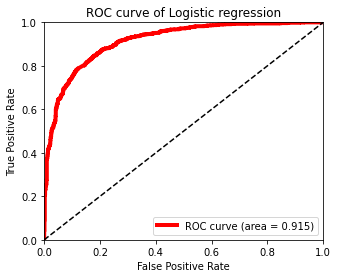

In [185]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC 계산
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프 출력
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

## 중요 키워드 분석하기 ##

<BarContainer object of 18633 artists>

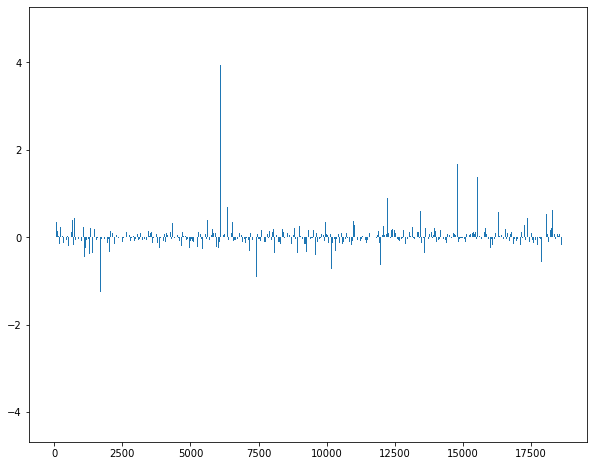

In [186]:
# 학습한 회귀 모델의 계수 출력
plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [187]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

[(4.818420645492769, 6174), (3.947883957775534, 6104), (3.7760184993138433, 16097), (3.308005488112332, 6219), (3.094779179949637, 14650)]
[(-2.821777270522753, 1691), (-3.053495772460432, 16113), (-3.4450267640521357, 8483), (-3.7604301195000125, 11086), (-4.2253236118988955, 7952)]


In [188]:
# 회귀 모델의 계수를 높은 순으로 정렬. 
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=False)

In [189]:
# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

# 계수가 높은 순으로 피처에 형태소를 맵핑한 결과를 출력 / 계수가 높은 피처는 리뷰에 긍정적인 영향을 주는 형태소
print(str(invert_index_vectorizer)[:100]+'..')

{3095: '넘/Verb', 6174: '맛있어요/Adjective', 12403: '예약/Noun', 17843: '할/Verb', 5119: '때/Noun', 3557: '는..


In [194]:
# 상위 100개 긍정 형태소 출력
for coef in coef_pos_index[:100]:
    print(invert_index_vectorizer[coef[1]], coef[0])

맛있어요/Adjective 4.818420645492769
맛있고/Adjective 3.947883957775534
최고/Noun 3.7760184993138433
맛있음/Adjective 3.308005488112332
존맛/Noun 3.094779179949637
맛있었어요/Adjective 2.812299065765044
맛있게/Adjective 2.576292172584039
좋아요/Adjective 2.5167394740460374
맛있네요/Adjective 2.3891748502444723
ㅎㅎ/KoreanParticle 2.3644890404854935
도/Josa 2.3455938769080027
분들/Suffix 2.3364954663981257
또/Noun 2.28811669418871
좋고/Adjective 2.242337059240039
추천/Noun 2.150128445919503
맛있습니다/Adjective 2.1095448718963192
친절하고/Adjective 2.0705197591901037
맛집/Noun 1.9825173695342928
맛있어서/Adjective 1.8654767748289318
굿/Noun 1.6924615072413771
좋았어요/Adjective 1.68700272855153
친절하시고/Adjective 1.6468362110487196
강남역/Noun 1.5836520779424228
넘/Verb 1.5747906670302418
잘/Verb 1.5716565870471186
친절함/Adjective 1.5487506656506915
맛있어용/Adjective 1.4841293293286382
강남/Noun 1.4795403985100661
님/Suffix 1.4470267071741771
친절해요/Adjective 1.4123365987005896
친절하세요/Adjective 1.4052990826224228
맛있다/Adjective 1.3914950818501115
짱/Noun 1.38810552

In [196]:
# 상위 100개 부정 형태소 출력
for coef in coef_neg_index[:100]:
    print(invert_index_vectorizer[coef[1]], coef[0])

별로/Noun -4.2253236118988955
안/VerbPrefix -3.7604301195000125
불친절/Noun -3.4450267640521357
최악/Noun -3.053495772460432
그냥/Noun -2.821777270522753
없음/Adjective -2.6242327851160634
은/Josa -2.4777494866066254
손님/Noun -2.309720330877334
보통/Noun -2.1194737261562233
불친절함/Adjective -2.1129643007342516
왜/Noun -2.0858247594985455
이/Josa -1.957465619235228
위생/Noun -1.9436307887143187
안/Noun -1.9190192863966382
고/Josa -1.9098726498156768
주문/Noun -1.8963960026631714
는/Josa -1.8731990346291982
없고/Adjective -1.8650860654563377
불친절해요/Adjective -1.8468248393044886
테이블/Noun -1.7487061580566772
를/Josa -1.7256065759330819
점/Noun -1.7168596601713093
돈/Noun -1.7053328274047477
마세요/Verb -1.6562749097577931
알바/Noun -1.6212562066659841
평범/Noun -1.5925108130516588
교육/Noun -1.583266215237091
맛없음/Adjective -1.570688198047144
맛없어요/Adjective -1.5624009123272176
노맛/Noun -1.4926347990101787
다시는/Verb -1.4885737621586206
을/Josa -1.4812580570083622
실망/Noun -1.4701114182659025
남자/Noun -1.4653024772183454
하지/Verb -1.458993

In [209]:
pos_list = []

for coef in coef_pos_index[:200]:
    pos_category = invert_index_vectorizer[coef[1]].split("/")[1]
    pos_list.append((invert_index_vectorizer[coef[1]], coef[0]))


[('맛있어요/Adjective', 4.818420645492769),
 ('맛있고/Adjective', 3.947883957775534),
 ('최고/Noun', 3.7760184993138433),
 ('맛있음/Adjective', 3.308005488112332),
 ('존맛/Noun', 3.094779179949637),
 ('맛있었어요/Adjective', 2.812299065765044),
 ('맛있게/Adjective', 2.576292172584039),
 ('좋아요/Adjective', 2.5167394740460374),
 ('맛있네요/Adjective', 2.3891748502444723),
 ('ㅎㅎ/KoreanParticle', 2.3644890404854935),
 ('도/Josa', 2.3455938769080027),
 ('분들/Suffix', 2.3364954663981257),
 ('또/Noun', 2.28811669418871),
 ('좋고/Adjective', 2.242337059240039),
 ('추천/Noun', 2.150128445919503),
 ('맛있습니다/Adjective', 2.1095448718963192),
 ('친절하고/Adjective', 2.0705197591901037),
 ('맛집/Noun', 1.9825173695342928),
 ('맛있어서/Adjective', 1.8654767748289318),
 ('굿/Noun', 1.6924615072413771),
 ('좋았어요/Adjective', 1.68700272855153),
 ('친절하시고/Adjective', 1.6468362110487196),
 ('강남역/Noun', 1.5836520779424228),
 ('넘/Verb', 1.5747906670302418),
 ('잘/Verb', 1.5716565870471186),
 ('친절함/Adjective', 1.5487506656506915),
 ('맛있어용/Adjective', 1.4841

In [242]:
neg_list = []

for coef in coef_neg_index[:200]:
    neg_category = invert_index_vectorizer[coef[1]].split("/")[1]
    neg_list.append((invert_index_vectorizer[coef[1]], coef[0]))


In [237]:
pos_df = pd.DataFrame(pos_list, columns = ['word_parts','weight'])


word_parts    weight
0    맛있어요/Adjective  4.818421
1     맛있고/Adjective  3.947884
2           최고/Noun  3.776018
3     맛있음/Adjective  3.308005
4           존맛/Noun  3.094779
..              ...       ...
195         크림/Noun  0.592335
196    좋게/Adjective  0.592099
197        햄버거/Noun  0.591787
198         맛맛/Noun  0.591350
199          지/Josa  0.590769

[200 rows x 2 columns]

### 조사 제거하기 ###

In [238]:
pos_df = pos_df[~pos_df.word_parts.str.contains('Josa')]

In [239]:
pos_df = pos_df.head(100)

In [240]:
pos_df['word'] = pos_df['word_parts'].apply(lambda x: text_cleaning(x))
del pos_df['word_parts']

pos_df = pos_df.reset_index(drop=True)

display(pos_df)

pos_df.to_csv("project_data/pos_df_test.csv")

weight    word
0   4.818421    맛있어요
1   3.947884     맛있고
2   3.776018      최고
3   3.308005     맛있음
4   3.094779      존맛
..       ...     ...
95  0.823532    좋아하는
96  0.812577  친절하셨어요
97  0.809943      직접
98  0.807949   친절하셔요
99  0.796626     개존맛

[100 rows x 2 columns]

In [250]:
neg_df = pd.DataFrame(neg_list, columns = ['word_parts','weight'])


word_parts    weight
0         별로/Noun -4.225324
1    안/VerbPrefix -3.760430
2        불친절/Noun -3.445027
3         최악/Noun -3.053496
4         그냥/Noun -2.821777
..            ...       ...
195       안내/Noun -0.625849
196       평점/Noun -0.625804
197      않은데/Verb -0.621467
198       구이/Noun -0.620810
199        반/Noun -0.620599

[200 rows x 2 columns]

In [251]:
neg_df = neg_df[~neg_df.word_parts.str.contains('Josa')]

In [253]:
neg_df = neg_df.head(100)

In [254]:
neg_df['word'] = neg_df['word_parts'].apply(lambda x: text_cleaning(x))
del neg_df['word_parts']

neg_df = neg_df.reset_index(drop=True)

display(neg_df)

neg_df.to_csv("project_data/neg_df_test.csv")

weight word
0  -4.225324   별로
1  -3.760430    안
2  -3.445027  불친절
3  -3.053496   최악
4  -2.821777   그냥
..       ...  ...
95 -0.830649    한
96 -0.830644   달라
97 -0.829900   없다
98 -0.826461    그
99 -0.824080  먹다가

[100 rows x 2 columns]